# 데이터 준비


## 라이브러리

In [ ]:
# 각종 라이브러리 가져오기
from sklearn.preprocessing import LabelEncoder # 라벨인코더(문자형데이터를 숫자형으로 변환하기 위해 사용)
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, r2_score # 혼동행렬 생성함수, 평균제곱오차, 정확도, 결정계수(R스퀘어)
from sklearn.ensemble import BaggingClassifier # 인공지능 모델

# 보조 라이브러리
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# 맷플롯립에서 폰트매지저(글꼴 관리자)를 가져온다.
import matplotlib.font_manager as fm

# 폰트 파일 설치
!apt-get -qq -y install fonts-nanum > /dev/null

# 글꼴 선택.
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

fm._rebuild()

# 맷플롯립에서 사용할 글꼴 지정
mpl.rc('font', family='NanumSquareRound') 
plt.rc('font', family='NanumSquareRound') 

# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)
plt.rc('axes', unicode_minus=False)

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 불러올 파일 위치 지정
%cd /content/drive/MyDrive/리미트리스(limitless)/핵심역량프로젝트/전북 장수 사과 당도 품질 데이터/라벨링 데이터 (csv)

/content/drive/MyDrive/리미트리스(limitless)/핵심역량프로젝트/전북 장수 사과 당도 품질 데이터/라벨링 데이터 (csv)


## 데이터 불러오기

In [ ]:
# 사과 종류별 train데이터 가져오기
sinano = pd.read_csv('apple_train_sinano.csv') # 훈련용 시나노골드 품종 사과 데이터
hongro = pd.read_csv('apple_train_hongro.csv') # 훈련용 홍로 품종 사과 데이터
arisu = pd.read_csv('apple_train_arisu.csv') # 훈련용 아리수 품종 사과 데이터
huji = pd.read_csv('apple_train_huji.csv') # 훈련용 후지 품종 사과 데이터

In [ ]:
# 사과 종류별 validation data 가져오기
sinano1 = pd.read_csv('apple_valid_sinano.csv') # 검증용 시나노 골드 품종 사과 데이터
hongro1 = pd.read_csv('apple_valid_hongro.csv') # 검증용 홍로 품종 사과 데이터
arisu1 = pd.read_csv('apple_valid_arisu.csv') # 검증용 아리수 품종 사과 데이터
huji1 = pd.read_csv('apple_valid_huji.csv') # 검증용 후지 품종 사과 데이터

## 데이터 전처리

In [ ]:
# 각각의 훈련용 사과데이터셋을 하나의 데이터셋으로 통합
tr_apple = pd.concat([huji,sinano,arisu,hongro])

In [ ]:
# 각각의 검증용 사과데이터셋을 하나의 데이터셋으로 통합
va_apple = pd.concat([huji1,sinano1,arisu1,hongro1])

In [ ]:
# 데이터 구성 확인
tr_apple

,Unnamed: 0,type,apple_kind,position,obj_num,sugar_content,sugar_content_nir,tod_attribute,tod_temper,soil_ec,...,img_angle,licenses_id,licenses_name,img_file_name,img_height,img_width,area,sugar_grade,segmentation,bbox
0,0,jpg,HJ,F02,19,NaN,14.0,FLIR C3X,26.2,1.05,...,0.0,1.0,apple01,20210829_RGB_14.0_F02_HJ_04_019_01_0_A.jpg,2448.0,2448.0,866134.0,A,"[1080.7021276595744, 423.04255319148933, 999.8...","[744.0, 408.0, 1037.0, 1052.0]"
1,1,jpg,HJ,F02,19,NaN,14.0,FLIR C3X,26.2,1.05,...,0.0,1.0,apple01,20210829_RGB_14.0_F02_HJ_04_019_02_0_A.jpg,2448.0,2448.0,783863.0,A,"[989.2127659574467, 514.531914893617, 893.4680...","[714.0, 514.0, 1016.0, 982.0]"
2,2,jpg,HJ,F02,19,NaN,14.0,FLIR C3X,26.2,1.05,...,0.0,1.0,apple01,20210829_RGB_14.0_F02_HJ_04_019_03_0_A.jpg,2448.0,2448.0,465384.0,A,"[1084.9574468085104, 906.0212765957447, 1023.2...","[863.0, 901.0, 765.0, 801.0]"
3,3,jpg,HJ,F02,19,NaN,14.0,FLIR C3X,26.2,1.05,...,0.0,1.0,apple01,20210829_RGB_14.0_F02_HJ_04_019_04_0_A.jpg,2448.0,2448.0,580276.0,A,"[1104.1063829787233, 931.5531914893617, 1021.1...","[936.0, 852.0, 822.0, 916.0]"
4,4,jpg,HJ,F02,19,NaN,14.0,FLIR C3X,26.2,1.05,...,270.0,1.0,apple01,20210829_RGB_14.0_F02_HJ_04_019_05_270_A.jpg,2448.0,2448.0,279574.0,A,"[1308.3617021276596, 663.4680851063829, 1274.3...","[1240.0, 537.0, 584.0, 623.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152579,152579,jpg,HR,F15,21,12.9,10.2,FLIR C3X,10.2,1.31,...,0.0,1.0,apple01,20210912_RGB_10.2_F15_HR_03_021_14_0_H.jpg,2560.0,1707.0,546451.0,C,"[1249, 1021, 1236, 975, 1207, 926, 1166, 868, ...","[495.0, 681.0, 790.0, 846.0]"
152580,152580,jpg,HR,F15,21,12.9,10.2,FLIR C3X,10.2,1.31,...,45.0,1.0,apple01,20210912_RGB_10.2_F15_HR_03_021_16_45_H.jpg,2560.0,1707.0,455566.0,C,"[722, 824, 670, 837, 629, 869, 589, 897, 549, ...","[413.0, 824.0, 728.0, 804.0]"
152581,152581,jpg,HR,F15,21,12.9,10.2,FLIR C3X,10.2,1.31,...,45.0,1.0,apple01,20210912_RGB_10.2_F15_HR_03_021_17_45_H.jpg,2560.0,1707.0,396631.0,C,"[747, 819, 814, 809, 850, 816, 901, 848, 952, ...","[449.0, 809.0, 682.0, 750.0]"
152582,152582,jpg,HR,F15,21,12.9,10.2,FLIR C3X,10.2,1.31,...,45.0,1.0,apple01,20210912_RGB_10.2_F15_HR_03_021_18_45_H.jpg,2560.0,1707.0,442992.0,C,"[590, 937, 721, 920, 750, 923, 807, 955, 883, ...","[328.0, 920.0, 699.0, 803.0]"


In [ ]:
# 데이터 구성 확인
va_apple

,Unnamed: 0,type,apple_kind,position,obj_num,sugar_content,sugar_content_nir,tod_attribute,tod_temper,soil_ec,...,img_angle,licenses_id,licenses_name,img_file_name,img_height,img_width,area,sugar_grade,segmentation,bbox
0,0,jpg,HJ,F03,24,NaN,14.0,FLIR C3X,23.9,1.02,...,0.0,1.0,apple01,20210829_RGB_14.0_F03_HJ_04_024_04_0_A.jpg,4032.0,3024.0,3567020.0,A,"[2446.5714285714284, 1564.4285714285713, 2425....","[303.0, 728.0, 2151.0, 2090.0]"
1,1,jpg,HJ,F14,30,NaN,14.0,FLIR C3X,27.0,0.60,...,0.0,1.0,apple01,20210829_RGB_14.0_F14_HJ_11_030_01_0_A.jpg,3024.0,3024.0,1951822.0,A,"[1694.3396226415093, 826.4150943396226, 1498.1...","[903.0, 811.0, 1645.0, 1450.0]"
2,2,jpg,HJ,F15,5,NaN,14.0,FLIR C3X,23.2,1.30,...,0.0,1.0,apple01,20210829_RGB_14.0_F15_HJ_03_005_01_0_A.jpg,3024.0,3024.0,1520721.0,A,"[1426.1538461538462, 767.6923076923076, 1189.2...","[764.0, 715.0, 1443.0, 1267.0]"
3,3,jpg,HJ,F15,5,NaN,14.0,FLIR C3X,23.2,1.30,...,0.0,1.0,apple01,20210829_RGB_14.0_F15_HJ_03_005_03_0_A.jpg,3024.0,3024.0,1255329.0,A,"[1345.8333333333335, 840.2777777777778, 1208.3...","[859.0, 801.0, 1275.0, 1231.0]"
4,4,jpg,HJ,F14,27,NaN,14.1,FLIR C3X,27.1,0.60,...,0.0,1.0,apple01,20210829_RGB_14.1_F14_HJ_05_027_01_0_A.jpg,3024.0,3024.0,1655794.0,A,"[765.7657657657657, 1094.5945945945946, 753.15...","[753.0, 636.0, 1502.0, 1362.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19079,jpg,HR,F13,58,NaN,10.2,FLIR C3X,10.8,1.30,...,0.0,1.0,apple01,20210912_RGB_10.2_F13_HR_03_058_14_0_H.jpg,2592.0,1728.0,551596.0,C,"[368, 1185, 369, 1252, 380, 1327, 396, 1392, 4...","[368.0, 696.0, 824.0, 852.0]"
19080,19080,jpg,HR,F13,65,NaN,10.2,FLIR C3X,10.4,1.30,...,0.0,1.0,apple01,20210912_RGB_10.2_F13_HR_03_065_01_0_H.jpg,2592.0,1728.0,553047.0,C,"[393, 1218, 402, 1303, 414, 1386, 439, 1470, 4...","[393.0, 867.0, 805.0, 823.0]"
19081,19081,jpg,HR,F13,65,NaN,10.2,FLIR C3X,10.4,1.30,...,45.0,1.0,apple01,20210912_RGB_10.2_F13_HR_03_065_17_45_H.jpg,2592.0,1728.0,482276.0,C,"[727, 869, 681, 877, 649, 888, 620, 901, 583, ...","[475.0, 860.0, 736.0, 808.0]"
19082,19082,jpg,HR,F13,65,NaN,10.2,FLIR C3X,10.4,1.30,...,270.0,1.0,apple01,20210912_RGB_10.2_F13_HR_03_065_19_270_H.jpg,1728.0,2592.0,885500.0,C,"[933, 458, 913, 497, 894, 545, 881, 587, 873, ...","[867.0, 192.0, 1052.0, 1075.0]"


In [ ]:
# 필요없는 열 제거(구분, 데이터셋 타입, 촬영농가위치, 파괴당도, 촬영 각도, 라이센스 고유번호, 라이센스 이름, 원천데이터(이미지) 이름, 이미지 세로크기, 이미지 가로크기, 어노테이션 면적, 세그멘테이션 좌표, 바운딩박스 정보, 촬영거리, 비파괴 당도)
tr_apple = tr_apple.drop(['Unnamed: 0','type','position','sugar_content','img_angle','licenses_id','licenses_name','img_file_name','img_height','img_width','area','segmentation','bbox','img_dist','sugar_content_nir','tod_attribute','img_attribute','img_time'], axis= 1)
va_apple = va_apple.drop(['Unnamed: 0','type','position','sugar_content','img_angle','licenses_id','licenses_name','img_file_name','img_height','img_width','area','segmentation','bbox','img_dist','sugar_content_nir','tod_attribute','img_attribute','img_time'], axis= 1)

In [ ]:
# 중복행 제거
tr_apple = tr_apple.drop_duplicates()
va_apple = va_apple.drop_duplicates()

In [ ]:
# 훈련용 데이터 확인
tr_apple

,apple_kind,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sunrise_time,sunset_time,sugar_grade
0,HJ,19,26.2,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,05:49,19:01,A
5,HJ,18,25.9,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,05:49,19:01,A
10,HJ,24,23.9,1.02,21.20,29.19,-0.2,20.96,96.37,22.0,05:49,19:01,A
13,HJ,11,27.5,0.75,20.65,33.44,-0.4,22.84,95.38,87.0,05:49,19:01,A
14,HJ,27,27.7,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,05:49,19:01,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152509,HR,38,11.0,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
152525,HR,51,11.3,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
152540,HR,58,10.8,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
152553,HR,65,10.4,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C


In [ ]:
# 검증용 데이터 확인
va_apple

,apple_kind,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sunrise_time,sunset_time,sugar_grade
0,HJ,24,23.9,1.02,21.20,29.19,-0.2,20.96,96.37,22.0,05:49,19:01,A
1,HJ,30,27.0,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,05:49,19:01,A
2,HJ,5,23.2,1.30,21.41,21.41,-2.7,17.78,92.40,105.0,05:49,19:01,A
4,HJ,27,27.1,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,05:49,19:01,A
6,HJ,7,28.4,0.74,22.07,41.40,-0.1,23.22,97.23,113.0,05:49,19:01,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19071,HR,38,11.0,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
19073,HR,51,11.3,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
19076,HR,58,10.8,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
19080,HR,65,10.4,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C


In [ ]:
# 결측값이 존재하는 행 제거(약 5%의 비율로 결측값이 존재하여 결측값을 대체가 아닌 제거를 선택)
tr_apple = tr_apple.dropna(axis=0)
va_apple = va_apple.dropna(axis=0)

In [ ]:
# 인덱스 0부터 순차 재정렬
tr_apple = tr_apple.reset_index(drop = True)
va_apple = va_apple.reset_index(drop = True)

In [ ]:
# 결측값 제거, 인덱스 번호 재정렬 여부 확인
tr_apple

,apple_kind,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sunrise_time,sunset_time,sugar_grade
0,HJ,19,26.2,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,05:49,19:01,A
1,HJ,18,25.9,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,05:49,19:01,A
2,HJ,24,23.9,1.02,21.20,29.19,-0.2,20.96,96.37,22.0,05:49,19:01,A
3,HJ,11,27.5,0.75,20.65,33.44,-0.4,22.84,95.38,87.0,05:49,19:01,A
4,HJ,27,27.7,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,05:49,19:01,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42343,HR,38,11.0,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
42344,HR,51,11.3,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
42345,HR,58,10.8,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
42346,HR,65,10.4,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C


In [ ]:
# 결측값 제거, 인덱스 번호 재정렬 여부 확인
va_apple

,apple_kind,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sunrise_time,sunset_time,sugar_grade
0,HJ,24,23.9,1.02,21.20,29.19,-0.2,20.96,96.37,22.0,05:49,19:01,A
1,HJ,30,27.0,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,05:49,19:01,A
2,HJ,5,23.2,1.30,21.41,21.41,-2.7,17.78,92.40,105.0,05:49,19:01,A
3,HJ,27,27.1,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,05:49,19:01,A
4,HJ,7,28.4,0.74,22.07,41.40,-0.1,23.22,97.23,113.0,05:49,19:01,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25875,HR,38,11.0,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
25876,HR,51,11.3,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
25877,HR,58,10.8,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
25878,HR,65,10.4,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C


In [ ]:
# 전처리(원핫 인코딩을 위한 데이터 통합)
total = pd.concat([tr_apple,va_apple], axis =0, ignore_index = True)

In [ ]:
# 필요없는 열 제거 여부 확인
total

,apple_kind,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sunrise_time,sunset_time,sugar_grade
0,HJ,19,26.2,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,05:49,19:01,A
1,HJ,18,25.9,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,05:49,19:01,A
2,HJ,24,23.9,1.02,21.20,29.19,-0.2,20.96,96.37,22.0,05:49,19:01,A
3,HJ,11,27.5,0.75,20.65,33.44,-0.4,22.84,95.38,87.0,05:49,19:01,A
4,HJ,27,27.7,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,05:49,19:01,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68223,HR,38,11.0,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
68224,HR,51,11.3,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
68225,HR,58,10.8,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C
68226,HR,65,10.4,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,06:01,18:40,C


In [ ]:
# 원핫 인코딩 진행 (사과종류, 사진촬영일시, 일출시간, 일몰시간)
total = pd.get_dummies(data = total, columns = ['apple_kind'], prefix = 'apple_kind')
total = pd.get_dummies(data = total, columns = ['sunset_time'], prefix = 'sunset_time')
total = pd.get_dummies(data = total, columns = ['sunrise_time'], prefix = 'sunrise_time')

In [ ]:
# 원핫 인코딩 진행결과 확인
total

,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sugar_grade,...,sunrise_time_06:28,sunrise_time_06:32,sunrise_time_06:33,sunrise_time_06:39,sunrise_time_06:40,sunrise_time_06:41,sunrise_time_06:42,sunrise_time_06:43,sunrise_time_06:45,sunrise_time_06:52
0,19,26.2,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,A,...,0,0,0,0,0,0,0,0,0,0
1,18,25.9,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,A,...,0,0,0,0,0,0,0,0,0,0
2,24,23.9,1.02,21.20,29.19,-0.2,20.96,96.37,22.0,A,...,0,0,0,0,0,0,0,0,0,0
3,11,27.5,0.75,20.65,33.44,-0.4,22.84,95.38,87.0,A,...,0,0,0,0,0,0,0,0,0,0
4,27,27.7,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,A,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68223,38,11.0,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0
68224,51,11.3,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0
68225,58,10.8,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0
68226,65,10.4,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 훈련용과 검증용 분리
# 훈련용, 검증용 데이터셋 분리
tr_apple = total.iloc[:42348,:]
va_apple = total.iloc[42348:,:]

In [ ]:
tr_apple

,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sugar_grade,...,sunrise_time_06:28,sunrise_time_06:32,sunrise_time_06:33,sunrise_time_06:39,sunrise_time_06:40,sunrise_time_06:41,sunrise_time_06:42,sunrise_time_06:43,sunrise_time_06:45,sunrise_time_06:52
0,19,26.2,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,A,...,0,0,0,0,0,0,0,0,0,0
1,18,25.9,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,A,...,0,0,0,0,0,0,0,0,0,0
2,24,23.9,1.02,21.20,29.19,-0.2,20.96,96.37,22.0,A,...,0,0,0,0,0,0,0,0,0,0
3,11,27.5,0.75,20.65,33.44,-0.4,22.84,95.38,87.0,A,...,0,0,0,0,0,0,0,0,0,0
4,27,27.7,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,A,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42343,38,11.0,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0
42344,51,11.3,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0
42345,58,10.8,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0
42346,65,10.4,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
va_apple = va_apple.reset_index(drop = True)

In [ ]:
va_apple

,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sugar_grade,...,sunrise_time_06:28,sunrise_time_06:32,sunrise_time_06:33,sunrise_time_06:39,sunrise_time_06:40,sunrise_time_06:41,sunrise_time_06:42,sunrise_time_06:43,sunrise_time_06:45,sunrise_time_06:52
0,24,23.9,1.02,21.20,29.19,-0.2,20.96,96.37,22.0,A,...,0,0,0,0,0,0,0,0,0,0
1,30,27.0,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,A,...,0,0,0,0,0,0,0,0,0,0
2,5,23.2,1.30,21.41,21.41,-2.7,17.78,92.40,105.0,A,...,0,0,0,0,0,0,0,0,0,0
3,27,27.1,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,A,...,0,0,0,0,0,0,0,0,0,0
4,7,28.4,0.74,22.07,41.40,-0.1,23.22,97.23,113.0,A,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25875,38,11.0,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0
25876,51,11.3,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0
25877,58,10.8,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0
25878,65,10.4,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,C,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# train_X, train_y 분리
train_y = tr_apple['sugar_grade']
train_X = tr_apple.drop(['sugar_grade'], axis = 1)

valid_y = va_apple['sugar_grade']
valid_X = va_apple.drop(['sugar_grade'], axis = 1)

In [ ]:
train_X

,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,apple_kind_AR,...,sunrise_time_06:28,sunrise_time_06:32,sunrise_time_06:33,sunrise_time_06:39,sunrise_time_06:40,sunrise_time_06:41,sunrise_time_06:42,sunrise_time_06:43,sunrise_time_06:45,sunrise_time_06:52
0,19,26.2,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,25.9,1.05,22.96,19.20,-0.1,23.47,95.55,25.0,0,...,0,0,0,0,0,0,0,0,0,0
2,24,23.9,1.02,21.20,29.19,-0.2,20.96,96.37,22.0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,27.5,0.75,20.65,33.44,-0.4,22.84,95.38,87.0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,27.7,0.60,21.70,31.85,-0.1,19.67,99.99,74.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42343,38,11.0,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,0,...,0,0,0,0,0,0,0,0,0,0
42344,51,11.3,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,0,...,0,0,0,0,0,0,0,0,0,0
42345,58,10.8,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,0,...,0,0,0,0,0,0,0,0,0,0
42346,65,10.4,1.30,19.56,21.25,-0.2,26.41,68.85,507.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# train_y 데이터프레임 형태로 변환
train_y = pd.DataFrame(train_y)
valid_y = pd.DataFrame(valid_y)

In [ ]:
train_y

,sugar_grade
0,A
1,A
2,A
3,A
4,A
...,...
42343,C
42344,C
42345,C
42346,C


## 목표값 라벨 인코딩

In [ ]:
# 훈련용 목표값(당도 등급)이 문자 범주형이라 사용할 모델 학습에 사용이 제한되어 숫자형으로 변환
encoder = LabelEncoder()
encoder.fit(train_y)
train_y = encoder.transform(train_y)
valid_y = encoder.transform(valid_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 인공지능 모델 제작 및 학습

In [ ]:
# 인공지능 모델 불러오기 (배깅:데이터 중복을 허용해서 샘플링하여 훈련 세트의 서브셋을 구성하여 하나의 분류기를 다르게 학습시키는 인공지능 모델)
model = BaggingClassifier(n_estimators = 120, random_state = 50)

In [ ]:
model.fit(train_X, train_y)

BaggingClassifier(n_estimators=120, random_state=50)

In [ ]:
model_pred = model.predict(valid_X)

In [ ]:
# 평균제곱오차(0에 가까울수록 예측력이 좋음)
# 정확도(전체 대비 정확하게 예측한 비율)
# 결정계수(1에 가까울수록 예측력이 좋음)
print(f'정확도: {accuracy_score(valid_y, model_pred): .4f}')
print('평균제곱오차: %.2f' % mean_squared_error(valid_y, model_pred))
print('결정계수: %.2f' % r2_score(valid_y, model_pred))

정확도:  0.9509
평균제곱오차: 0.08
결정계수: 0.86


In [ ]:
matrix = confusion_matrix(valid_y, model_pred)

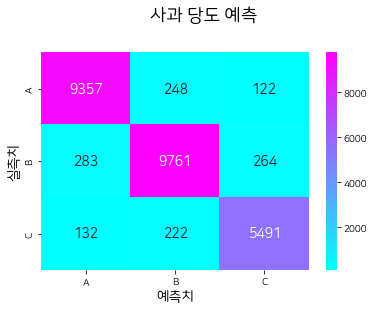

In [ ]:
등급 = ['A','B','C'] 

sns.heatmap(data = matrix, 
            annot=True,
            annot_kws={"size": 14},
            cmap= 'cool',
            xticklabels= 등급,
            yticklabels= 등급,
            fmt = 'd')

plt.xlabel('예측치', fontsize=14)
plt.ylabel('실측치', fontsize=14)

plt.suptitle("사과 당도 예측", y=1.04, size=18)
plt.show()

# 모형 저장하기

In [ ]:
import joblib
joblib.dump(model, "/content/gdrive/My Drive/apple_model.pkl")

['/content/gdrive/My Drive/apple_model.pkl']